In [1]:
from pykrx import stock
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from functions import KOSPI_KOSDAQ_tickers, find_ticker_name, ohlcv_to_csv

In [3]:
# Today's ticker lists of KOSPI and KOSDAQ
kospi, kosdaq = KOSPI_KOSDAQ_tickers(datetime.now())

In [4]:
# 2023년 10월부터 11월까지의 등락률과 거래대금
df = stock.get_market_price_change("20231001", "20231201")
volatility_and_volume = df[['등락률', '거래대금']]

# 거래대금이 0인 종목들 제거하기
zero_rows = df[df['거래대금'] == 0].index
volatility_and_volume = volatility_and_volume.drop(zero_rows)

In [5]:
x = volatility_and_volume['거래대금'].to_numpy()
y = volatility_and_volume['등락률'].to_numpy()

Text(0, 0.5, 'volatility')

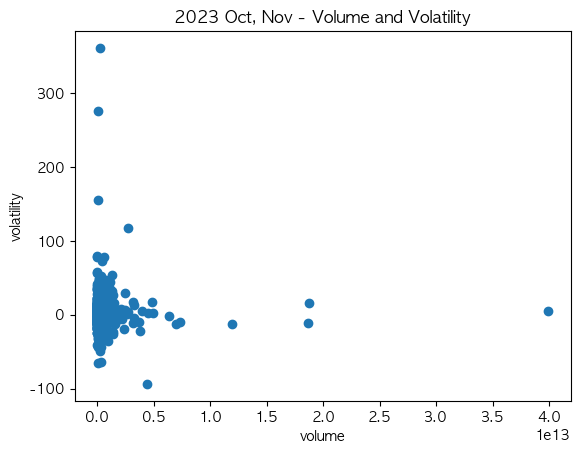

In [6]:
plt.scatter(x, y)
plt.title('2023 Oct, Nov - Volume and Volatility')
plt.xlabel('volume')
plt.ylabel('volatility')

In [7]:
# outliers 정의
outliers = volatility_and_volume[((volatility_and_volume['거래대금'] > 10**(13)) |
                                 (volatility_and_volume['등락률'] > 10**2))]

# outliers를 제외한 targets
targets = volatility_and_volume[~((volatility_and_volume['거래대금'] > 10**(13)) |
                                 (volatility_and_volume['등락률'] > 10**2))]

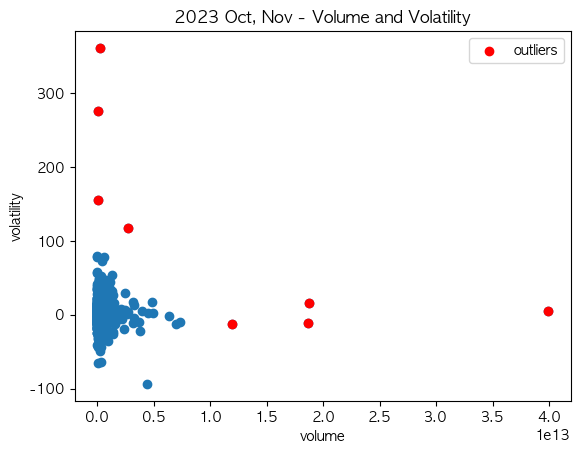

In [8]:
plt.scatter(x, y)
plt.scatter(outliers['거래대금'], outliers['등락률'], color = 'r', label = 'outliers')
plt.title('2023 Oct, Nov - Volume and Volatility')
plt.xlabel('volume')
plt.ylabel('volatility')
plt.legend()

plt.savefig('VV0.png')

In [9]:
# 타겟 종목 : 팬오션(026870)
y0, x0 = targets.loc['028670']

# 타겟 종목 : 대원전선우(002720)
y1, x1 = targets.loc['002720']

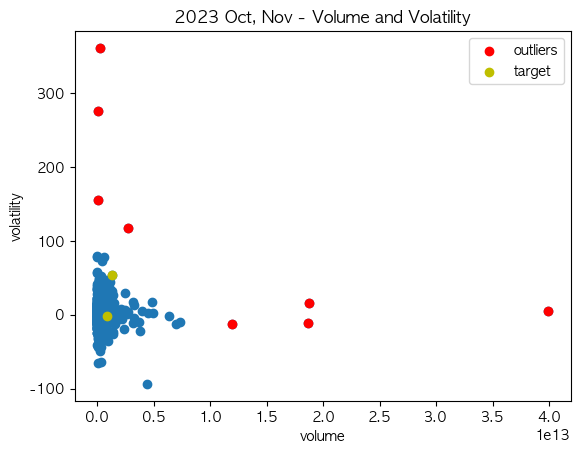

In [10]:
plt.scatter(x, y)
plt.scatter(outliers['거래대금'], outliers['등락률'], color = 'r', label = 'outliers')
plt.scatter([x0,x1], [y0,y1], color = 'y', label = 'target')
plt.title('2023 Oct, Nov - Volume and Volatility')
plt.xlabel('volume')
plt.ylabel('volatility')
plt.legend()

plt.savefig('VV1.png')